# 🔍 Article Enrichment Analysis for TTD Newsletter

This notebook is an interactive replica of the article enrichment flow using [Metaflow](https://metaflow.org/).

You can run the complete flow using the following command:

```bash
python -m ttd.flows.article_enrichment.flow
```

To learn more about how Metaflow works, see the [official documentation](https://docs.metaflow.org/).

This flow processes articles by classifying, summarizing, tagging, and clustering them across multiple steps:

<img src="images/article_enrichment_flow.png" width="300">

Use this notebook to **explore, test, and validate** the enrichment process using dummy data.

> ⚠️ **Make sure to execute all steps in order** to obtain valid results.  
> 🔎 **Inspect the flow state at each step** to better understand the data transformations.  

## Flow

### 📦 Flow Parameter Setup

In [1]:
from metaflow import FlowSpec, step, Parameter
from pydantic import BaseModel, Field
from datetime import datetime

from ttd.utils.print import safe_pretty_print

class FlowParametersSchema(BaseModel):
    """Schema for flow parameters."""
    articles_table: str = Field(
        'articles', description="Table to load articles from"
    )
    articles_limit: int = Field(
        2, description="Maximum number of articles to process"
    )
    date_threshold: datetime = Field(
        'Thu, 03 Apr 2025 18:00:00 +0000', description="Process articles published after this date"
    )
    replicates_table: str = Field(   
        'replicated_articles', description="Replicate articles to this table"
    )
    clean_tables: bool = Field(
        False, description="Clean tables (tags, tag_clusters, replicated_articles)"
    )
    class Config:
        extra = 'allow'
    pass

flow = FlowParametersSchema(
    articles_table='replicated_articles',
    replicates_table='dummy_table',
    articles_limit=2,
    clean_tables=True
)
safe_pretty_print(flow.model_dump())

/Users/mathieucrilout/.miniconda3/envs/ttd/lib/python3.10/site-packages/pydantic/main.py:426: UserWarning: Pydantic serializer warnings:
  Expected `datetime` but got `str` with value `'Thu, 03 Apr 2025 18:00:00 +0000'` - serialized value may not be as expected
  return self.__pydantic_serializer__.to_python(


{
    'articles_table': 'replicated_articles',
    'articles_limit': 2,
    'date_threshold': 'Thu, 03 Apr 2025 18:00:00 +0000',
    'replicates_table': 'dummy_table',
    'clean_tables': True
}

### **1. Start step**
Init, config, parameters, tracks versioning...

In [2]:
from ttd.flows.article_enrichment.steps.start import execute as start_step

start_step(flow)
safe_pretty_print(flow.model_dump())

2025-06-05 18:18:19,528 - ttd.flows.article_enrichment.steps.start - INFO - ✅ Database first connection established.
2025-06-05 18:18:20,093 - ttd.flows.article_enrichment.steps.start - INFO - ✅ Database cleaned.
/Users/mathieucrilout/.miniconda3/envs/ttd/lib/python3.10/site-packages/pydantic/main.py:426: UserWarning: Pydantic serializer warnings:
  Expected `datetime` but got `str` with value `'Thu, 03 Apr 2025 18:00:00 +0000'` - serialized value may not be as expected
  return self.__pydantic_serializer__.to_python(


{
    'articles_table': 'replicated_articles',
    'articles_limit': 2,
    'date_threshold': 'Thu, 03 Apr 2025 18:00:00 +0000',
    'replicates_table': 'dummy_table',
    'clean_tables': True,
    'config': {
        'data_dir': '/Users/mathieucrilout/Repos/train_tune_deploy/data',
        'db_path': '/Users/mathieucrilout/Repos/train_tune_deploy/data/ttd_tinydb.json',
        'feeds_path': '/Users/mathieucrilout/Repos/train_tune_deploy/data/rss_feeds.txt',
        'feeds_stealth_path': 
'/Users/mathieucrilout/Repos/train_tune_deploy/data/rss_feeds_stealth.txt'
    },
    'git_metadata': {
        'git_commit': 'bd7572bd26c471af16f6d2840bb76f6055901993',
        'git_branch': 'dev',
        'git_repo': 'git@github.com:mcrilo33/train-tune-deploy.git'
    },
    'parsed_date_threshold': datetime.datetime(2025, 4, 3, 18, 0, 
tzinfo=datetime.timezone.utc),
    'metrics': {}
}

### **2. Load articles step**

In [3]:
from ttd.flows.article_enrichment.steps.load_articles \
    import execute as load_articles_step

load_articles_step(flow)
safe_pretty_print(flow.model_dump())

2025-06-05 18:18:20,131 - ttd.flows.article_enrichment.steps.load_articles - INFO - Loading articles...
/Users/mathieucrilout/.miniconda3/envs/ttd/lib/python3.10/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
2025-06-05 18:18:20,344 - ttd.flows.article_enrichment.steps.load_articles - INFO - ✅ Loaded 2 articles from 'replicated_articles': len(articles)=2, date_threshold='2025-04-03 18:00:00+00:00'
2025-06-05 18:18:20,345 - ttd.flows.article_enrichment.steps.load_articles - INFO - ✅ Filtering out already replicated articles...
2025-06-05 18:18:20,424 - ttd.flows.article_enrichment.steps.load_articles - INFO - ✅ There are 0 already replicated articles
2025-06-05 18:18:20,424 - ttd.flows.article_enrichment.steps.load_articles -

{
    'articles_table': 'replicated_articles',
    'articles_limit': 2,
    'date_threshold': 'Thu, 03 Apr 2025 18:00:00 +0000',
    'replicates_table': 'dummy_table',
    'clean_tables': True,
    'config': {
        'data_dir': '/Users/mathieucrilout/Repos/train_tune_deploy/data',
        'db_path': '/Users/mathieucrilout/Repos/train_tune_deploy/data/ttd_tinydb.json',
        'feeds_path': '/Users/mathieucrilout/Repos/train_tune_deploy/data/rss_feeds.txt',
        'feeds_stealth_path': 
'/Users/mathieucrilout/Repos/train_tune_deploy/data/rss_feeds_stealth.txt'
    },
    'git_metadata': {
        'git_commit': 'bd7572bd26c471af16f6d2840bb76f6055901993',
        'git_branch': 'dev',
        'git_repo': 'git@github.com:mcrilo33/train-tune-deploy.git'
    },
    'parsed_date_threshold': datetime.datetime(2025, 4, 3, 18, 0, 
tzinfo=datetime.timezone.utc),
    'metrics': {
        'step_start_times': {
            'load_articles': 1749140300.132374
        },
        'step_duration': {
            'load_articles': 0.29239487648010254
        }
    },
    'articles': [
        {
            'table_name': 'replicated_articles',
            'title': 'Trump Tariffs Unleash Shift in Global Economy',
            'author': 'Pablo Valerio',
            'published_date': 'Thu, 03 Apr 2025 18:00:00 +0000',
            'url_domain': 'eetimes.com',
            'url': 
'https://www.eetimes.com/trump-tariffs-unleash-shift-in-global-economy/',
            'summary': 'Trump tariffs, now 54% on Chinese goods, threaten to raise 
electronics prices. C...',
            'tags': [
                'News',
                'Supply Chain & Distribution',
                'Supply Chain Analysis',
                'Global Trade',
                'supply chain disruptions',
                'Tariffs',
                'Trump administration'
            ],
            'html_content_length': 358447,
            'text_content_length': 9980,
            'summary_length': 225,
            'summary_text_ratio': 0.022545090180360723,
            'created_at': '2025-05-13T11:47:12.223219',
            'execution_time': 0,
            'original_table_name': 'article',
            'last_updated': '2025-04-28T15:04:13.940886',
            'text_content_artifact': {
                'path': 
'/Users/mathieucrilout/Repos/train_tune_deploy/data/artifacts/articles/2025/04/ar...',
                'format': 'text',
                'encoding': 'utf-8'
            },
            'html_content_artifact': {
                'path': 
'/Users/mathieucrilout/Repos/train_tune_deploy/data/artifacts/articles/2025/04/ar...',
                'format': 'text',
                'encoding': 'utf-8'
            },
            'original_doc_id': '1',
            'is_ai_added': False,
            'doc_id': '1'
        },
        {
            'table_name': 'replicated_articles',
            'title': 'Meet Open-Qwen2VL: A Fully Open and Compute-Efficient Multimodal 
Large Language ...',
            'author': 'Asif Razzaq',
            'published_date': 'Fri, 04 Apr 2025 05:15:52 +0000',
            'url_domain': 'marktechpost.com',
            'url': 
'https://www.marktechpost.com/2025/04/03/meet-open-qwen2vl-a-fully-open-and-compu...',
            'summary': 'Multimodal Large Language Models (MLLMs) have advanced the 
integration of visual...',
            'tags': [
                'AI Paper Summary',
                'AI Shorts',
                'Applications',
                'Artificial Intelligence',
                'Editors Pick',
                'Language Model',
                'Large Language Model',
                'Machine Learning',
                'New Releases',
                'Open Source',
                'Staff',
                'Tech News',
                'Technology'
            ],
            'html_content_length': 370768,
            'text_content_length': 5752,
            'summary_length': 539,
            'summary_text_ratio': 0.09370653685674547,
            'created_at': '2

### **3. Is AI articles step**

Checks if articles talk about AI or not

In [4]:
from ttd.flows.article_enrichment.steps.is_ai_articles \
    import execute as is_ai_articles_step

is_ai_articles_step(flow)
safe_pretty_print(flow.model_dump())

2025-06-05 18:18:21,106 - numexpr.utils - INFO - NumExpr defaulting to 10 threads.
2025-06-05 18:18:21,298 - ttd.flows.article_enrichment.steps.is_ai_articles - INFO - Classifying articles as AI-related...
2025-06-05 18:18:21,303 - ttd.flows.predict - INFO - ✅ Loading model spec: article_is_ai_classifier_spec


ModelSpec(
    name='article_is_ai_classifier_spec',
    version='v1',
    description='Classifies if article is about AI',
    input_schema=<class 'ttd.models.specs.article_is_ai_classifier_spec.IsAIInput'>,
    output_schema=<class 'ttd.models.specs.article_is_ai_classifier_spec.IsAIOutput'>,
    model_id=None,
    provider='openai',
    config=OpenRouterConfig(
        prompt_spec=PromptTemplateSpec(
            name='article_is_ai_prompt',
            version='v1.0.0',
            description='Determine whether an article is primarily about AI',
            input_schema=<class 
'ttd.models.specs.article_is_ai_classifier_spec.IsAIInput'>,
            output_schema=<class 
'ttd.models.specs.article_is_ai_classifier_spec.IsAIOutput'>,
            template='\nYou are an expert AI researcher.\n\nYour task is to determine if 
the following article is primarily about Artificial Intelligence (AI). This includes 
topics such as:\n- AI models, large language models (LLMs), machine learning, generative 
AI\n- AI applications in science, business, health, robotics, NLP, computer vision\n- 
Ethical, regulatory, or economic implications of AI\n\nDo **not** classify it as 
AI-related if:\n- It only mentions AI briefly without relevance to the core topic\n- It 
uses "AI" metaphorically or for unrelated tech or business 
news\n\n---\nTITLE:\n"""{title}"""\nARTICLE:\n"""{text_content}"""\n\n---\nReturn ONLY 
true or false (no explanation, no punctuation).\n'
        ),
        base_url='https://openrouter.ai/api/v1',
        model_name='google/gemini-2.0-flash-001',
        api_key_env_var='OPENROUTER_API_KEY',
        api_key='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
',
        temperature=0.0,
        max_tokens=5000,
        n=1
    )
)

2025-06-05 18:18:21,306 - ttd.flows.predict - INFO - None
2025-06-05 18:18:21,307 - ttd.flows.predict - INFO - ✅ Provider 'openai'  Model 'google/gemini-2.0-flash-001' 
2025-06-05 18:18:21,307 - ttd.flows.predict - INFO - ✅ Predict 1/2 
2025-06-05 18:18:21,307 - ttd.flows.predict - INFO - ✅ Inputs:


{
    'title': 'Trump Tariffs Unleash Shift in Global Economy',
    'text_content': 'designLines AI & Big Data Designline\nTrump Tariffs Unleash Shift in 
Global Econo...'
}

2025-06-05 18:18:21,308 - ttd.flows.predict - INFO - None
2025-06-05 18:18:21,920 - httpx - INFO - HTTP Request: POST https://openrouter.ai/api/v1/chat/completions "HTTP/1.1 200 OK"
2025-06-05 18:18:21,983 - ttd.flows.predict - INFO - ✅ Outputs:


{
    'output': False,
    'metadata': {
        'prompt_tokens': 2172,
        'completion_tokens': 2,
        'total_tokens': 2174,
        'duration': 0.6745469570159912
    }
}

2025-06-05 18:18:21,987 - ttd.flows.predict - INFO - None
2025-06-05 18:18:21,990 - ttd.flows.predict - INFO - ✅ Provider 'openai'  Model 'google/gemini-2.0-flash-001' 
2025-06-05 18:18:21,991 - ttd.flows.predict - INFO - ✅ Predict 2/2 
2025-06-05 18:18:21,991 - ttd.flows.predict - INFO - ✅ Inputs:


{
    'title': 'Meet Open-Qwen2VL: A Fully Open and Compute-Efficient Multimodal Large 
Language ...',
    'text_content': '__Reddit\n__Vote\n__Flip\n__Share\n__Tweet\n0 Shares\nMultimodal 
Large Language Models...'
}

2025-06-05 18:18:21,993 - ttd.flows.predict - INFO - None
2025-06-05 18:18:22,394 - httpx - INFO - HTTP Request: POST https://openrouter.ai/api/v1/chat/completions "HTTP/1.1 200 OK"
2025-06-05 18:18:22,412 - ttd.flows.predict - INFO - ✅ Outputs:


{
    'output': True,
    'metadata': {
        'prompt_tokens': 1390,
        'completion_tokens': 2,
        'total_tokens': 1392,
        'duration': 0.41863012313842773
    }
}

2025-06-05 18:18:22,415 - ttd.flows.predict - INFO - None
2025-06-05 18:18:22,415 - ttd.flows.article_enrichment.steps.is_ai_articles - INFO - ✅ Step is_ai_articles done in 1.12s
/Users/mathieucrilout/.miniconda3/envs/ttd/lib/python3.10/site-packages/pydantic/main.py:426: UserWarning: Pydantic serializer warnings:
  Expected `datetime` but got `str` with value `'Thu, 03 Apr 2025 18:00:00 +0000'` - serialized value may not be as expected
  return self.__pydantic_serializer__.to_python(


{
    'articles_table': 'replicated_articles',
    'articles_limit': 2,
    'date_threshold': 'Thu, 03 Apr 2025 18:00:00 +0000',
    'replicates_table': 'dummy_table',
    'clean_tables': True,
    'config': {
        'data_dir': '/Users/mathieucrilout/Repos/train_tune_deploy/data',
        'db_path': '/Users/mathieucrilout/Repos/train_tune_deploy/data/ttd_tinydb.json',
        'feeds_path': '/Users/mathieucrilout/Repos/train_tune_deploy/data/rss_feeds.txt',
        'feeds_stealth_path': 
'/Users/mathieucrilout/Repos/train_tune_deploy/data/rss_feeds_stealth.txt'
    },
    'git_metadata': {
        'git_commit': 'bd7572bd26c471af16f6d2840bb76f6055901993',
        'git_branch': 'dev',
        'git_repo': 'git@github.com:mcrilo33/train-tune-deploy.git'
    },
    'parsed_date_threshold': datetime.datetime(2025, 4, 3, 18, 0, 
tzinfo=datetime.timezone.utc),
    'metrics': {
        'step_start_times': {
            'load_articles': 1749140300.132374,
            'is_ai_articles': 1749140301.299119
        },
        'step_duration': {
            'load_articles': 0.29239487648010254,
            'is_ai_articles': 1.1164608001708984
        },
        'models_spec_names': {
            'is_ai_articles': 'article_is_ai_classifier_spec'
        },
        'models_io': {
            'article_is_ai_classifier_spec': {
                'inputs': [
                    {
                        'article_id': '1'
                    },
                    {
                        'article_id': '93'
                    }
                ],
                'outputs': [
                    {
                        'output': False,
                        'metadata': {
                            'prompt_tokens': 2172,
                            'completion_tokens': 2,
                            'total_tokens': 2174,
                            'duration': 0.6745469570159912
                        }
                    },
                    {
                        'output': True,
                        'metadata': {
                            'prompt_tokens': 1390,
                            'completion_tokens': 2,
                            'total_tokens': 1392,
                            'duration': 0.41863012313842773
                        }
                    }
                ],
                'errors': []
            }
        }
    },
    'articles': [
        {
            'table_name': 'replicated_articles',
            'title': 'Trump Tariffs Unleash Shift in Global Economy',
            'author': 'Pablo Valerio',
            'published_date': 'Thu, 03 Apr 2025 18:00:00 +0000',
            'url_domain': 'eetimes.com',
            'url': 
'https://www.eetimes.com/trump-tariffs-unleash-shift-in-global-economy/',
            'summary': 'Trump tariffs, now 54% on Chinese goods, threaten to raise 
electronics prices. C...',
            'tags': [
                'News',
                'Supply Chain & Distribution',
                'Supply Chain Analysis',
                'Global Trade',
                'supply chain disruptions',
                'Tariffs',
                'Trump administration'
            ],
            'html_content_length': 358447,
            'text_content_length': 9980,
            'summary_length': 225,
            'summary_text_ratio': 0.022545090180360723,
            'created_at': '2025-05-13T11:47:12.223219',
            'execution_time': 0,
            'original_table_name': 'article',
            'last_updated': '2025-04-28T15:04:13.940886',
            'text_content_artifact': {
                'path': 
'/Users/mathieucrilout/Repos/train_tune_deploy/data/artifacts/articles/2025/04/ar...',
                'format': 'text',
                'encoding': 'utf-8'
            },
            'html_content_artifact': {
                'path': 
'/Users/mathieucrilout/Repos/train_tune_deploy/data/artifacts/articles/2025/04/ar...',
                'format': 'text',
                'encoding': 'utf-8'
    

### **4. Dense summarizer step**

Generates a dense summary from articles

In [5]:
from ttd.flows.article_enrichment.steps.dense_summarizer \
    import execute as dense_summarizer_step

dense_summarizer_step(flow)
safe_pretty_print(flow.model_dump())

2025-06-05 18:18:22,436 - ttd.flows.article_enrichment.steps.dense_summarizer - INFO - Generating dense summaries for AI-related articles...
2025-06-05 18:18:22,437 - ttd.flows.article_enrichment.steps.dense_summarizer - INFO - ✅ Article 1/2 
2025-06-05 18:18:22,437 - ttd.flows.article_enrichment.steps.dense_summarizer - INFO - ✅ Article 2/2 
2025-06-05 18:18:22,444 - ttd.flows.predict - INFO - ✅ Loading model spec: dense_summarizer_spec


ModelSpec(
    name='dense_summarizer_spec',
    version='v1',
    description='Extracts a dense summary from an article.',
    input_schema=<class 'ttd.models.specs.dense_summarizer_spec.DenseSummarizerInput'>,
    output_schema=<class 'ttd.models.specs.dense_summarizer_spec.DenseSummarizerOutput'>,
    model_id=None,
    provider='openai',
    config=OpenRouterConfig(
        prompt_spec=PromptTemplateSpec(
            name='dense_summarizer_prompt',
            version='v1.0.0',
            description='Extract a dense summary from an article.',
            input_schema=<class 
'ttd.models.specs.dense_summarizer_spec.DenseSummarizerInput'>,
            output_schema=<class 
'ttd.models.specs.dense_summarizer_spec.DenseSummarizerOutput'>,
            template='\nYou are an expert summarizer trained to produce high-density, 
information-rich summaries.\n\nYour goal is to condense an article into the **shortest 
possible summary that preserves every critical point**:\n- Facts, arguments, results, 
conclusions\n- Technical terms and named entities\n- No repetition or fluff\n- No 
commentary, opinions, or rhetorical questions\n\nYou are **not optimizing for 
readability**. You are **optimizing for signal-to-noise ratio**.\nEach sentence should 
carry **maximum unique information**.\n\nYou will be given:\n- An article title\n- The 
full article 
text\n\n---\n\nTITLE:\n"""{title}"""\nARTICLE:\n"""{text_content}"""\n\n---\n\nYour 
task:\nWrite the most **compressed and factual summary** possible (in under 300 words). 
Use neutral language. Do **not** include the title or metadata. Return only the 
summary.\n'
        ),
        base_url='https://openrouter.ai/api/v1',
        model_name='google/gemini-2.0-flash-001',
        api_key_env_var='OPENROUTER_API_KEY',
        api_key='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
',
        temperature=0.0,
        max_tokens=5000,
        n=1
    )
)

2025-06-05 18:18:22,447 - ttd.flows.predict - INFO - None
2025-06-05 18:18:22,448 - ttd.flows.predict - INFO - ✅ Provider 'openai'  Model 'google/gemini-2.0-flash-001' 
2025-06-05 18:18:22,448 - ttd.flows.predict - INFO - ✅ Predict 1/1 
2025-06-05 18:18:22,448 - ttd.flows.predict - INFO - ✅ Inputs:


{
    'title': 'Meet Open-Qwen2VL: A Fully Open and Compute-Efficient Multimodal Large 
Language ...',
    'text_content': '__Reddit\n__Vote\n__Flip\n__Share\n__Tweet\n0 Shares\nMultimodal 
Large Language Models...'
}

2025-06-05 18:18:22,449 - ttd.flows.predict - INFO - None
2025-06-05 18:18:23,077 - httpx - INFO - HTTP Request: POST https://openrouter.ai/api/v1/chat/completions "HTTP/1.1 200 OK"
2025-06-05 18:18:25,131 - ttd.flows.predict - INFO - ✅ Outputs:


{
    'output': 'Open-Qwen2VL, a 2-billion parameter Multimodal Large Language Model (MLLM) 
devel...',
    'metadata': {
        'prompt_tokens': 1421,
        'completion_tokens': 375,
        'total_tokens': 1796,
        'duration': 2.682039976119995
    }
}

2025-06-05 18:18:25,135 - ttd.flows.predict - INFO - None
2025-06-05 18:18:25,135 - ttd.flows.article_enrichment.steps.dense_summarizer - INFO - ✅ Step dense_summarizer done in 2.70s


{
    'articles_table': 'replicated_articles',
    'articles_limit': 2,
    'date_threshold': 'Thu, 03 Apr 2025 18:00:00 +0000',
    'replicates_table': 'dummy_table',
    'clean_tables': True,
    'config': {
        'data_dir': '/Users/mathieucrilout/Repos/train_tune_deploy/data',
        'db_path': '/Users/mathieucrilout/Repos/train_tune_deploy/data/ttd_tinydb.json',
        'feeds_path': '/Users/mathieucrilout/Repos/train_tune_deploy/data/rss_feeds.txt',
        'feeds_stealth_path': 
'/Users/mathieucrilout/Repos/train_tune_deploy/data/rss_feeds_stealth.txt'
    },
    'git_metadata': {
        'git_commit': 'bd7572bd26c471af16f6d2840bb76f6055901993',
        'git_branch': 'dev',
        'git_repo': 'git@github.com:mcrilo33/train-tune-deploy.git'
    },
    'parsed_date_threshold': datetime.datetime(2025, 4, 3, 18, 0, 
tzinfo=datetime.timezone.utc),
    'metrics': {
        'step_start_times': {
            'load_articles': 1749140300.132374,
            'is_ai_articles': 1749140301.299119,
            'dense_summarizer': 1749140302.43723
        },
        'step_duration': {
            'load_articles': 0.29239487648010254,
            'is_ai_articles': 1.1164608001708984,
            'dense_summarizer': 2.6985809803009033
        },
        'models_spec_names': {
            'is_ai_articles': 'article_is_ai_classifier_spec',
            'dense_summarizer': 'dense_summarizer_spec'
        },
        'models_io': {
            'article_is_ai_classifier_spec': {
                'inputs': [
                    {
                        'article_id': '1'
                    },
                    {
                        'article_id': '93'
                    }
                ],
                'outputs': [
                    {
                        'output': False,
                        'metadata': {
                            'prompt_tokens': 2172,
                            'completion_tokens': 2,
                            'total_tokens': 2174,
                            'duration': 0.6745469570159912
                        }
                    },
                    {
                        'output': True,
                        'metadata': {
                            'prompt_tokens': 1390,
                            'completion_tokens': 2,
                            'total_tokens': 1392,
                            'duration': 0.41863012313842773
                        }
                    }
                ],
                'errors': []
            },
            'dense_summarizer_spec': {
                'inputs': [
                    None,
                    {
                        'article_id': '93'
                    }
                ],
                'outputs': [
                    None,
                    {
                        'output': 'Open-Qwen2VL, a 2-billion parameter Multimodal Large 
Language Model (MLLM) devel...',
                        'metadata': {
                            'prompt_tokens': 1421,
                            'completion_tokens': 375,
                            'total_tokens': 1796,
                            'duration': 2.682039976119995
                        },
                        'doc_id': '93'
                    }
                ],
                'errors': []
            }
        }
    },
    'articles': [
        {
            'table_name': 'replicated_articles',
            'title': 'Trump Tariffs Unleash Shift in Global Economy',
            'author': 'Pablo Valerio',
            'published_date': 'Thu, 03 Apr 2025 18:00:00 +0000',
            'url_domain': 'eetimes.com',
            'url': 
'https://www.eetimes.com/trump-tariffs-unleash-shift-in-global-economy/',
            'summary': 'Trump tariffs, now 54% on Chinese goods, threaten to raise 
electronics prices. C...',
            'tags': [
                'News',
                'Supply Chain & Distribution',
                'Supply Chain Analysis',
                'Global Tra

### **5. Core line summarizer step**

Generates a core line summary from a dense summary.

In [6]:
from ttd.flows.article_enrichment.steps.core_line_summarizer \
    import execute as core_line_summarizer_step

core_line_summarizer_step(flow)
safe_pretty_print(flow.model_dump())

2025-06-05 18:18:25,158 - ttd.flows.article_enrichment.steps.core_line_summarizer - INFO - Generating core line summaries for AI-related articles...
2025-06-05 18:18:25,159 - ttd.flows.article_enrichment.steps.core_line_summarizer - INFO - ✅ Article 1/2 
2025-06-05 18:18:25,160 - ttd.flows.article_enrichment.steps.core_line_summarizer - INFO - ✅ Article 2/2 
2025-06-05 18:18:25,166 - ttd.flows.predict - INFO - ✅ Loading model spec: core_line_summarizer_spec


ModelSpec(
    name='core_line_summarizer_spec',
    version='v1',
    description='Extracts a dense summary from an article',
    input_schema=<class 
'ttd.models.specs.core_line_summarizer_spec.CoreLineSummarizerInput'>,
    output_schema=<class 
'ttd.models.specs.core_line_summarizer_spec.CoreLineSummarizerOutput'>,
    model_id=None,
    provider='openai',
    config=OpenRouterConfig(
        prompt_spec=PromptTemplateSpec(
            name='core_line_summarizer_prompt',
            version='v1.0.0',
            description='Extract a core line from an article',
            input_schema=<class 
'ttd.models.specs.core_line_summarizer_spec.CoreLineSummarizerInput'>,
            output_schema=<class 
'ttd.models.specs.core_line_summarizer_spec.CoreLineSummarizerOutput'>,
            template='\nYou are a professional summarizer tasked with producing a 
**single-sentence summary** that captures the **main idea and significance** of a dense 
technical or factual summary.\n\nYour summary must be:\n- **Concise**: 1 sentence only 
(ideally under 30 words)\n- **Clear**: Use plain, direct, and factual language\n- 
**Focused**: Emphasize the core message and why it matters\n- **No fluff**: Avoid generic 
phrases, opinions, or vague statements\n\nYou will be given:\n- A dense summary of an 
article\n\n---\n\nDENSE SUMMARY:\n"""{output}"""\n\n---\n\nWrite a one-line summary that 
highlights the **key point** and its **relevance**.\nReturn only the sentence — no bullet 
points, titles, or extra text.\n'
        ),
        base_url='https://openrouter.ai/api/v1',
        model_name='google/gemini-2.0-flash-001',
        api_key_env_var='OPENROUTER_API_KEY',
        api_key='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
',
        temperature=0.0,
        max_tokens=5000,
        n=1
    )
)

2025-06-05 18:18:25,170 - ttd.flows.predict - INFO - None
2025-06-05 18:18:25,170 - ttd.flows.predict - INFO - ✅ Provider 'openai'  Model 'google/gemini-2.0-flash-001' 
2025-06-05 18:18:25,170 - ttd.flows.predict - INFO - ✅ Predict 1/1 
2025-06-05 18:18:25,171 - ttd.flows.predict - INFO - ✅ Inputs:


{
    'output': 'Open-Qwen2VL, a 2-billion parameter Multimodal Large Language Model (MLLM) 
devel...'
}

2025-06-05 18:18:25,171 - ttd.flows.predict - INFO - None
2025-06-05 18:18:25,756 - httpx - INFO - HTTP Request: POST https://openrouter.ai/api/v1/chat/completions "HTTP/1.1 200 OK"
2025-06-05 18:18:26,232 - ttd.flows.predict - INFO - ✅ Outputs:


{
    'output': 'Open-Qwen2VL offers an efficient, open-source MLLM alternative, achieving 
compet...',
    'metadata': {
        'prompt_tokens': 535,
        'completion_tokens': 39,
        'total_tokens': 574,
        'duration': 1.0605261325836182
    }
}

2025-06-05 18:18:26,234 - ttd.flows.predict - INFO - None
2025-06-05 18:18:26,234 - ttd.flows.article_enrichment.steps.core_line_summarizer - INFO - ✅ Step core_line_summarizer done in 1.08s


{
    'articles_table': 'replicated_articles',
    'articles_limit': 2,
    'date_threshold': 'Thu, 03 Apr 2025 18:00:00 +0000',
    'replicates_table': 'dummy_table',
    'clean_tables': True,
    'config': {
        'data_dir': '/Users/mathieucrilout/Repos/train_tune_deploy/data',
        'db_path': '/Users/mathieucrilout/Repos/train_tune_deploy/data/ttd_tinydb.json',
        'feeds_path': '/Users/mathieucrilout/Repos/train_tune_deploy/data/rss_feeds.txt',
        'feeds_stealth_path': 
'/Users/mathieucrilout/Repos/train_tune_deploy/data/rss_feeds_stealth.txt'
    },
    'git_metadata': {
        'git_commit': 'bd7572bd26c471af16f6d2840bb76f6055901993',
        'git_branch': 'dev',
        'git_repo': 'git@github.com:mcrilo33/train-tune-deploy.git'
    },
    'parsed_date_threshold': datetime.datetime(2025, 4, 3, 18, 0, 
tzinfo=datetime.timezone.utc),
    'metrics': {
        'step_start_times': {
            'load_articles': 1749140300.132374,
            'is_ai_articles': 1749140301.299119,
            'dense_summarizer': 1749140302.43723,
            'core_line_summarizer': 1749140305.1593971
        },
        'step_duration': {
            'load_articles': 0.29239487648010254,
            'is_ai_articles': 1.1164608001708984,
            'dense_summarizer': 2.6985809803009033,
            'core_line_summarizer': 1.0753769874572754
        },
        'models_spec_names': {
            'is_ai_articles': 'article_is_ai_classifier_spec',
            'dense_summarizer': 'dense_summarizer_spec',
            'core_line_summarizer': 'core_line_summarizer_spec'
        },
        'models_io': {
            'article_is_ai_classifier_spec': {
                'inputs': [
                    {
                        'article_id': '1'
                    },
                    {
                        'article_id': '93'
                    }
                ],
                'outputs': [
                    {
                        'output': False,
                        'metadata': {
                            'prompt_tokens': 2172,
                            'completion_tokens': 2,
                            'total_tokens': 2174,
                            'duration': 0.6745469570159912
                        }
                    },
                    {
                        'output': True,
                        'metadata': {
                            'prompt_tokens': 1390,
                            'completion_tokens': 2,
                            'total_tokens': 1392,
                            'duration': 0.41863012313842773
                        }
                    }
                ],
                'errors': []
            },
            'dense_summarizer_spec': {
                'inputs': [
                    None,
                    {
                        'article_id': '93'
                    }
                ],
                'outputs': [
                    None,
                    {
                        'output': 'Open-Qwen2VL, a 2-billion parameter Multimodal Large 
Language Model (MLLM) devel...',
                        'metadata': {
                            'prompt_tokens': 1421,
                            'completion_tokens': 375,
                            'total_tokens': 1796,
                            'duration': 2.682039976119995
                        },
                        'doc_id': '93'
                    }
                ],
                'errors': []
            },
            'core_line_summarizer_spec': {
                'inputs': [
                    None,
                    {
                        'article_id': '93'
                    }
                ],
                'outputs': [
                    None,
                    {
                        'output': 'Open-Qwen2VL offers an efficient, open-source MLLM 
alternative, achieving compet...',
                        'metadata': {
                            'prompt_tokens': 535,
       

### **6. Tagger step**

Predict main tags over articles using dense summmaries.

In [7]:
from ttd.flows.article_enrichment.steps.tagger import execute as tagger_step

tagger_step(flow)
safe_pretty_print(flow.model_dump())

2025-06-05 18:18:26,251 - ttd.flows.article_enrichment.steps.tagger - INFO - Extracting tags from dense summaries...
2025-06-05 18:18:26,252 - ttd.flows.article_enrichment.steps.tagger - INFO - ✅ Article 1/2 
2025-06-05 18:18:26,252 - ttd.flows.article_enrichment.steps.tagger - INFO - ✅ Article 2/2 
2025-06-05 18:18:26,258 - ttd.flows.predict - INFO - ✅ Loading model spec: tagger_spec


ModelSpec(
    name='tagger_spec',
    version='v1',
    description='Extracts a dense summary from an article.',
    input_schema=<class 'ttd.models.specs.tagger_spec.TaggerInput'>,
    output_schema=<class 'ttd.models.specs.tagger_spec.TaggerOutput'>,
    model_id=None,
    provider='openai',
    config=OpenRouterConfig(
        prompt_spec=PromptTemplateSpec(
            name='tagger_prompt',
            version='v1.0.0',
            description='Find the most relevant tags for an article.',
            input_schema=<class 'ttd.models.specs.tagger_spec.TaggerInput'>,
            output_schema=<class 'ttd.models.specs.tagger_spec.TaggerOutput'>,
            template='\nYou are a professional AI content classifier.\n\nYour task is to 
extract a **clean, concise list of tags** from a dense summary of an article.\nThese tags 
will be used to group related articles in a knowledge graph and recommendation 
system.\n\n**Order the tags** by relevance and generality:\n1. Start with the tags that 
best represent the article\'s main theme.\n2. Between same relevance tags, prefer the most
general ones first.\n\nYour output must follow these rules:\n\n- Tags must represent the 
**core themes or subjects** of the article — only include tags essential to its 
message.\n- Tags must be **useful for grouping** articles by shared topics - avoid overly 
specific tags.\n- Tags must be **mutually distinct**:\n    - Do **not include synonyms, 
variants, or abbreviations of other tags** already listed (e.g., "large language models" 
and "LLMs" — choose only one).\n    - When multiple forms of a concept exist, **always 
prefer the full descriptive form** (e.g., "large language models" instead of "LLMs").\n   
- Use **standardized, recognizable terminology**.\n- Do **not include duplicates**, 
partial matches, or overlapping phrases.\n- Keep the list between 3 and 7 tags, unless the
content clearly demands more.\n\nYou will be provided with:\n- A dense summary of the 
article\n\n---\n\nDENSE SUMMARY:\n"""{output}"""\n\n---\n\nReturn a **comma-separated 
list** of clean, distinct tags.\nExample: `large language models,generative AI,AI 
ethics,medical imaging`\n\nDo **not** include duplicates, synonyms, or 
near-duplicates.\nDo **not** add quotes, explanations, or formatting — just return the 
list.\n'
        ),
        base_url='https://openrouter.ai/api/v1',
        model_name='google/gemini-2.0-flash-001',
        api_key_env_var='OPENROUTER_API_KEY',
        api_key='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
',
        temperature=0.0,
        max_tokens=5000,
        n=1
    )
)

2025-06-05 18:18:26,261 - ttd.flows.predict - INFO - None
2025-06-05 18:18:26,261 - ttd.flows.predict - INFO - ✅ Provider 'openai'  Model 'google/gemini-2.0-flash-001' 
2025-06-05 18:18:26,261 - ttd.flows.predict - INFO - ✅ Predict 1/1 
2025-06-05 18:18:26,262 - ttd.flows.predict - INFO - ✅ Inputs:


{
    'output': 'Open-Qwen2VL, a 2-billion parameter Multimodal Large Language Model (MLLM) 
devel...'
}

2025-06-05 18:18:26,262 - ttd.flows.predict - INFO - None
2025-06-05 18:18:26,724 - httpx - INFO - HTTP Request: POST https://openrouter.ai/api/v1/chat/completions "HTTP/1.1 200 OK"
2025-06-05 18:18:26,840 - ttd.flows.predict - INFO - ✅ Outputs:


{
    'output': [
        'large language models',
        'multimodal learning',
        'open source',
        'model training',
        'transfer learning'
    ],
    'metadata': {
        'prompt_tokens': 741,
        'completion_tokens': 16,
        'total_tokens': 757,
        'duration': 0.5773379802703857
    }
}

2025-06-05 18:18:26,842 - ttd.flows.predict - INFO - None
2025-06-05 18:18:26,842 - ttd.flows.article_enrichment.steps.tagger - INFO - ✅ Step tagger done in 0.59s


{
    'articles_table': 'replicated_articles',
    'articles_limit': 2,
    'date_threshold': 'Thu, 03 Apr 2025 18:00:00 +0000',
    'replicates_table': 'dummy_table',
    'clean_tables': True,
    'config': {
        'data_dir': '/Users/mathieucrilout/Repos/train_tune_deploy/data',
        'db_path': '/Users/mathieucrilout/Repos/train_tune_deploy/data/ttd_tinydb.json',
        'feeds_path': '/Users/mathieucrilout/Repos/train_tune_deploy/data/rss_feeds.txt',
        'feeds_stealth_path': 
'/Users/mathieucrilout/Repos/train_tune_deploy/data/rss_feeds_stealth.txt'
    },
    'git_metadata': {
        'git_commit': 'bd7572bd26c471af16f6d2840bb76f6055901993',
        'git_branch': 'dev',
        'git_repo': 'git@github.com:mcrilo33/train-tune-deploy.git'
    },
    'parsed_date_threshold': datetime.datetime(2025, 4, 3, 18, 0, 
tzinfo=datetime.timezone.utc),
    'metrics': {
        'step_start_times': {
            'load_articles': 1749140300.132374,
            'is_ai_articles': 1749140301.299119,
            'dense_summarizer': 1749140302.43723,
            'core_line_summarizer': 1749140305.1593971,
            'tagger': 1749140306.252494
        },
        'step_duration': {
            'load_articles': 0.29239487648010254,
            'is_ai_articles': 1.1164608001708984,
            'dense_summarizer': 2.6985809803009033,
            'core_line_summarizer': 1.0753769874572754,
            'tagger': 0.5900669097900391
        },
        'models_spec_names': {
            'is_ai_articles': 'article_is_ai_classifier_spec',
            'dense_summarizer': 'dense_summarizer_spec',
            'core_line_summarizer': 'core_line_summarizer_spec',
            'tagger': 'tagger_spec'
        },
        'models_io': {
            'article_is_ai_classifier_spec': {
                'inputs': [
                    {
                        'article_id': '1'
                    },
                    {
                        'article_id': '93'
                    }
                ],
                'outputs': [
                    {
                        'output': False,
                        'metadata': {
                            'prompt_tokens': 2172,
                            'completion_tokens': 2,
                            'total_tokens': 2174,
                            'duration': 0.6745469570159912
                        }
                    },
                    {
                        'output': True,
                        'metadata': {
                            'prompt_tokens': 1390,
                            'completion_tokens': 2,
                            'total_tokens': 1392,
                            'duration': 0.41863012313842773
                        }
                    }
                ],
                'errors': []
            },
            'dense_summarizer_spec': {
                'inputs': [
                    None,
                    {
                        'article_id': '93'
                    }
                ],
                'outputs': [
                    None,
                    {
                        'output': 'Open-Qwen2VL, a 2-billion parameter Multimodal Large 
Language Model (MLLM) devel...',
                        'metadata': {
                            'prompt_tokens': 1421,
                            'completion_tokens': 375,
                            'total_tokens': 1796,
                            'duration': 2.682039976119995
                        },
                        'doc_id': '93'
                    }
                ],
                'errors': []
            },
            'core_line_summarizer_spec': {
                'inputs': [
                    None,
                    {
                        'article_id': '93'
                    }
                ],
                'outputs': [
                    None,
                    {
                        'output': 'Open-Qwen2VL offers an efficient, open-source MLLM 
alternativ

### **7. Merge same tags step**

Aggregates common tags in articles -> Will be used to update tags representations at the next step.

In [8]:
from ttd.flows.article_enrichment.steps.merge_same_tags \
    import execute as merge_same_tags_step

merge_same_tags_step(flow)
safe_pretty_print(flow.model_dump())

2025-06-05 18:18:26,862 - ttd.flows.article_enrichment.steps.merge_same_tags - INFO - Merging extracted tags...
2025-06-05 18:18:26,862 - ttd.flows.article_enrichment.steps.merge_same_tags - INFO - ✅ Merge 2/2 
2025-06-05 18:18:26,862 - ttd.flows.article_enrichment.steps.merge_same_tags - INFO - ✅ Inputs:


[
    'large language models',
    'multimodal learning',
    'open source',
    'model training',
    'transfer learning'
]

2025-06-05 18:18:26,863 - ttd.flows.article_enrichment.steps.merge_same_tags - INFO - None
2025-06-05 18:18:26,864 - ttd.flows.article_enrichment.steps.merge_same_tags - INFO - ✅ large language models 2/5 - 1 Items
2025-06-05 18:18:26,864 - ttd.flows.article_enrichment.steps.merge_same_tags - INFO - ✅ Merged tags 1 - 1 Items


{
    'large language models': {
        'output': 'large language models',
        'history': [
            'Fri, 04 Apr 2025 05:15:52 +0000'
        ],
        'doc_ids': [
            {
                'original_table_name': 'replicated_articles',
                'original_doc_id': '93'
            }
        ]
    }
}

2025-06-05 18:18:26,865 - ttd.flows.article_enrichment.steps.merge_same_tags - INFO - None
2025-06-05 18:18:26,865 - ttd.flows.article_enrichment.steps.merge_same_tags - INFO - ✅ multimodal learning 2/5 - 2 Items
2025-06-05 18:18:26,865 - ttd.flows.article_enrichment.steps.merge_same_tags - INFO - ✅ Merged tags 2 - 2 Items


{
    'large language models': {
        'output': 'large language models',
        'history': [
            'Fri, 04 Apr 2025 05:15:52 +0000'
        ],
        'doc_ids': [
            {
                'original_table_name': 'replicated_articles',
                'original_doc_id': '93'
            }
        ]
    },
    'multimodal learning': {
        'output': 'multimodal learning',
        'history': [
            'Fri, 04 Apr 2025 05:15:52 +0000'
        ],
        'doc_ids': [
            {
                'original_table_name': 'replicated_articles',
                'original_doc_id': '93'
            }
        ]
    }
}

2025-06-05 18:18:26,867 - ttd.flows.article_enrichment.steps.merge_same_tags - INFO - None
2025-06-05 18:18:26,867 - ttd.flows.article_enrichment.steps.merge_same_tags - INFO - ✅ open source 2/5 - 3 Items
2025-06-05 18:18:26,867 - ttd.flows.article_enrichment.steps.merge_same_tags - INFO - ✅ Merged tags 3 - 3 Items


{
    'large language models': {
        'output': 'large language models',
        'history': [
            'Fri, 04 Apr 2025 05:15:52 +0000'
        ],
        'doc_ids': [
            {
                'original_table_name': 'replicated_articles',
                'original_doc_id': '93'
            }
        ]
    },
    'multimodal learning': {
        'output': 'multimodal learning',
        'history': [
            'Fri, 04 Apr 2025 05:15:52 +0000'
        ],
        'doc_ids': [
            {
                'original_table_name': 'replicated_articles',
                'original_doc_id': '93'
            }
        ]
    },
    'open source': {
        'output': 'open source',
        'history': [
            'Fri, 04 Apr 2025 05:15:52 +0000'
        ],
        'doc_ids': [
            {
                'original_table_name': 'replicated_articles',
                'original_doc_id': '93'
            }
        ]
    }
}

2025-06-05 18:18:26,869 - ttd.flows.article_enrichment.steps.merge_same_tags - INFO - None
2025-06-05 18:18:26,869 - ttd.flows.article_enrichment.steps.merge_same_tags - INFO - ✅ model training 2/5 - 4 Items
2025-06-05 18:18:26,869 - ttd.flows.article_enrichment.steps.merge_same_tags - INFO - ✅ Merged tags 4 - 4 Items


{
    'large language models': {
        'output': 'large language models',
        'history': [
            'Fri, 04 Apr 2025 05:15:52 +0000'
        ],
        'doc_ids': [
            {
                'original_table_name': 'replicated_articles',
                'original_doc_id': '93'
            }
        ]
    },
    'multimodal learning': {
        'output': 'multimodal learning',
        'history': [
            'Fri, 04 Apr 2025 05:15:52 +0000'
        ],
        'doc_ids': [
            {
                'original_table_name': 'replicated_articles',
                'original_doc_id': '93'
            }
        ]
    },
    'open source': {
        'output': 'open source',
        'history': [
            'Fri, 04 Apr 2025 05:15:52 +0000'
        ],
        'doc_ids': [
            {
                'original_table_name': 'replicated_articles',
                'original_doc_id': '93'
            }
        ]
    },
    'model training': {
        'output': 'model training',
        'history': [
            'Fri, 04 Apr 2025 05:15:52 +0000'
        ],
        'doc_ids': [
            {
                'original_table_name': 'replicated_articles',
                'original_doc_id': '93'
            }
        ]
    }
}

2025-06-05 18:18:26,871 - ttd.flows.article_enrichment.steps.merge_same_tags - INFO - None
2025-06-05 18:18:26,872 - ttd.flows.article_enrichment.steps.merge_same_tags - INFO - ✅ transfer learning 2/5 - 5 Items
2025-06-05 18:18:26,872 - ttd.flows.article_enrichment.steps.merge_same_tags - INFO - ✅ Merged tags 5 - 5 Items


{
    'large language models': {
        'output': 'large language models',
        'history': [
            'Fri, 04 Apr 2025 05:15:52 +0000'
        ],
        'doc_ids': [
            {
                'original_table_name': 'replicated_articles',
                'original_doc_id': '93'
            }
        ]
    },
    'multimodal learning': {
        'output': 'multimodal learning',
        'history': [
            'Fri, 04 Apr 2025 05:15:52 +0000'
        ],
        'doc_ids': [
            {
                'original_table_name': 'replicated_articles',
                'original_doc_id': '93'
            }
        ]
    },
    'open source': {
        'output': 'open source',
        'history': [
            'Fri, 04 Apr 2025 05:15:52 +0000'
        ],
        'doc_ids': [
            {
                'original_table_name': 'replicated_articles',
                'original_doc_id': '93'
            }
        ]
    },
    'model training': {
        'output': 'model training',
        'history': [
            'Fri, 04 Apr 2025 05:15:52 +0000'
        ],
        'doc_ids': [
            {
                'original_table_name': 'replicated_articles',
                'original_doc_id': '93'
            }
        ]
    },
    'transfer learning': {
        'output': 'transfer learning',
        'history': [
            'Fri, 04 Apr 2025 05:15:52 +0000'
        ],
        'doc_ids': [
            {
                'original_table_name': 'replicated_articles',
                'original_doc_id': '93'
            }
        ]
    }
}

2025-06-05 18:18:26,875 - ttd.flows.article_enrichment.steps.merge_same_tags - INFO - None
2025-06-05 18:18:26,875 - ttd.flows.article_enrichment.steps.merge_same_tags - INFO - ✅ Step merge_same_tags done in 0.01s


{
    'articles_table': 'replicated_articles',
    'articles_limit': 2,
    'date_threshold': 'Thu, 03 Apr 2025 18:00:00 +0000',
    'replicates_table': 'dummy_table',
    'clean_tables': True,
    'config': {
        'data_dir': '/Users/mathieucrilout/Repos/train_tune_deploy/data',
        'db_path': '/Users/mathieucrilout/Repos/train_tune_deploy/data/ttd_tinydb.json',
        'feeds_path': '/Users/mathieucrilout/Repos/train_tune_deploy/data/rss_feeds.txt',
        'feeds_stealth_path': 
'/Users/mathieucrilout/Repos/train_tune_deploy/data/rss_feeds_stealth.txt'
    },
    'git_metadata': {
        'git_commit': 'bd7572bd26c471af16f6d2840bb76f6055901993',
        'git_branch': 'dev',
        'git_repo': 'git@github.com:mcrilo33/train-tune-deploy.git'
    },
    'parsed_date_threshold': datetime.datetime(2025, 4, 3, 18, 0, 
tzinfo=datetime.timezone.utc),
    'metrics': {
        'step_start_times': {
            'load_articles': 1749140300.132374,
            'is_ai_articles': 1749140301.299119,
            'dense_summarizer': 1749140302.43723,
            'core_line_summarizer': 1749140305.1593971,
            'tagger': 1749140306.252494,
            'merge_same_tags': 1749140306.862488
        },
        'step_duration': {
            'load_articles': 0.29239487648010254,
            'is_ai_articles': 1.1164608001708984,
            'dense_summarizer': 2.6985809803009033,
            'core_line_summarizer': 1.0753769874572754,
            'tagger': 0.5900669097900391,
            'merge_same_tags': 0.012887001037597656
        },
        'models_spec_names': {
            'is_ai_articles': 'article_is_ai_classifier_spec',
            'dense_summarizer': 'dense_summarizer_spec',
            'core_line_summarizer': 'core_line_summarizer_spec',
            'tagger': 'tagger_spec',
            'merge_same_tags': 'merge_same_tags_db'
        },
        'models_io': {
            'article_is_ai_classifier_spec': {
                'inputs': [
                    {
                        'article_id': '1'
                    },
                    {
                        'article_id': '93'
                    }
                ],
                'outputs': [
                    {
                        'output': False,
                        'metadata': {
                            'prompt_tokens': 2172,
                            'completion_tokens': 2,
                            'total_tokens': 2174,
                            'duration': 0.6745469570159912
                        }
                    },
                    {
                        'output': True,
                        'metadata': {
                            'prompt_tokens': 1390,
                            'completion_tokens': 2,
                            'total_tokens': 1392,
                            'duration': 0.41863012313842773
                        }
                    }
                ],
                'errors': []
            },
            'dense_summarizer_spec': {
                'inputs': [
                    None,
                    {
                        'article_id': '93'
                    }
                ],
                'outputs': [
                    None,
                    {
                        'output': 'Open-Qwen2VL, a 2-billion parameter Multimodal Large 
Language Model (MLLM) devel...',
                        'metadata': {
                            'prompt_tokens': 1421,
                            'completion_tokens': 375,
                            'total_tokens': 1796,
                            'duration': 2.682039976119995
                        },
                        'doc_id': '93'
                    }
                ],
                'errors': []
            },
            'core_line_summarizer_spec': {
                'inputs': [
                    None,
                    {
                        'article_id': '93'
                    }
                ],
                'o

### **8. Update tags step**

Update tags histories (will be used to decide best representant for tags clusters).

In [9]:
from ttd.flows.article_enrichment.steps.update_tags import execute as update_tags_step

update_tags_step(flow)
safe_pretty_print(flow.model_dump())

2025-06-05 18:18:26,894 - ttd.flows.article_enrichment.steps.update_tags - INFO - Saving merged tags to database...
2025-06-05 18:18:27,056 - ttd.flows.article_enrichment.steps.update_tags - INFO - ✅ Update 1/5 
2025-06-05 18:18:27,056 - ttd.flows.article_enrichment.steps.update_tags - INFO - ✅ Inputs:


{
    'output': 'large language models',
    'history': [
        'Fri, 04 Apr 2025 05:15:52 +0000'
    ],
    'doc_ids': [
        {
            'original_table_name': 'replicated_articles',
            'original_doc_id': '93'
        }
    ]
}

2025-06-05 18:18:27,057 - ttd.flows.article_enrichment.steps.update_tags - INFO - None
2025-06-05 18:18:27,286 - ttd.flows.article_enrichment.steps.update_tags - INFO - ✅ Creating new tag: large language models
2025-06-05 18:18:27,557 - ttd.flows.article_enrichment.steps.update_tags - INFO - ✅ Update 2/5 
2025-06-05 18:18:27,557 - ttd.flows.article_enrichment.steps.update_tags - INFO - ✅ Inputs:


{
    'output': 'multimodal learning',
    'history': [
        'Fri, 04 Apr 2025 05:15:52 +0000'
    ],
    'doc_ids': [
        {
            'original_table_name': 'replicated_articles',
            'original_doc_id': '93'
        }
    ]
}

2025-06-05 18:18:27,558 - ttd.flows.article_enrichment.steps.update_tags - INFO - None
2025-06-05 18:18:27,683 - ttd.flows.article_enrichment.steps.update_tags - INFO - ✅ Creating new tag: multimodal learning
2025-06-05 18:18:27,748 - ttd.flows.article_enrichment.steps.update_tags - INFO - ✅ Update 3/5 
2025-06-05 18:18:27,748 - ttd.flows.article_enrichment.steps.update_tags - INFO - ✅ Inputs:


{
    'output': 'open source',
    'history': [
        'Fri, 04 Apr 2025 05:15:52 +0000'
    ],
    'doc_ids': [
        {
            'original_table_name': 'replicated_articles',
            'original_doc_id': '93'
        }
    ]
}

2025-06-05 18:18:27,749 - ttd.flows.article_enrichment.steps.update_tags - INFO - None
2025-06-05 18:18:27,876 - ttd.flows.article_enrichment.steps.update_tags - INFO - ✅ Creating new tag: open source
2025-06-05 18:18:27,989 - ttd.flows.article_enrichment.steps.update_tags - INFO - ✅ Update 4/5 
2025-06-05 18:18:27,990 - ttd.flows.article_enrichment.steps.update_tags - INFO - ✅ Inputs:


{
    'output': 'model training',
    'history': [
        'Fri, 04 Apr 2025 05:15:52 +0000'
    ],
    'doc_ids': [
        {
            'original_table_name': 'replicated_articles',
            'original_doc_id': '93'
        }
    ]
}

2025-06-05 18:18:27,991 - ttd.flows.article_enrichment.steps.update_tags - INFO - None
2025-06-05 18:18:28,113 - ttd.flows.article_enrichment.steps.update_tags - INFO - ✅ Creating new tag: model training
2025-06-05 18:18:28,167 - ttd.flows.article_enrichment.steps.update_tags - INFO - ✅ Update 5/5 
2025-06-05 18:18:28,167 - ttd.flows.article_enrichment.steps.update_tags - INFO - ✅ Inputs:


{
    'output': 'transfer learning',
    'history': [
        'Fri, 04 Apr 2025 05:15:52 +0000'
    ],
    'doc_ids': [
        {
            'original_table_name': 'replicated_articles',
            'original_doc_id': '93'
        }
    ]
}

2025-06-05 18:18:28,168 - ttd.flows.article_enrichment.steps.update_tags - INFO - None
2025-06-05 18:18:28,322 - ttd.flows.article_enrichment.steps.update_tags - INFO - ✅ Creating new tag: transfer learning
2025-06-05 18:18:28,323 - ttd.flows.article_enrichment.steps.update_tags - INFO - ✅ Step update_tags done in 1.43s


{
    'articles_table': 'replicated_articles',
    'articles_limit': 2,
    'date_threshold': 'Thu, 03 Apr 2025 18:00:00 +0000',
    'replicates_table': 'dummy_table',
    'clean_tables': True,
    'config': {
        'data_dir': '/Users/mathieucrilout/Repos/train_tune_deploy/data',
        'db_path': '/Users/mathieucrilout/Repos/train_tune_deploy/data/ttd_tinydb.json',
        'feeds_path': '/Users/mathieucrilout/Repos/train_tune_deploy/data/rss_feeds.txt',
        'feeds_stealth_path': 
'/Users/mathieucrilout/Repos/train_tune_deploy/data/rss_feeds_stealth.txt'
    },
    'git_metadata': {
        'git_commit': 'bd7572bd26c471af16f6d2840bb76f6055901993',
        'git_branch': 'dev',
        'git_repo': 'git@github.com:mcrilo33/train-tune-deploy.git'
    },
    'parsed_date_threshold': datetime.datetime(2025, 4, 3, 18, 0, 
tzinfo=datetime.timezone.utc),
    'metrics': {
        'step_start_times': {
            'load_articles': 1749140300.132374,
            'is_ai_articles': 1749140301.299119,
            'dense_summarizer': 1749140302.43723,
            'core_line_summarizer': 1749140305.1593971,
            'tagger': 1749140306.252494,
            'merge_same_tags': 1749140306.862488,
            'update_tags': 1749140306.894921
        },
        'step_duration': {
            'load_articles': 0.29239487648010254,
            'is_ai_articles': 1.1164608001708984,
            'dense_summarizer': 2.6985809803009033,
            'core_line_summarizer': 1.0753769874572754,
            'tagger': 0.5900669097900391,
            'merge_same_tags': 0.012887001037597656,
            'update_tags': 1.4283571243286133
        },
        'models_spec_names': {
            'is_ai_articles': 'article_is_ai_classifier_spec',
            'dense_summarizer': 'dense_summarizer_spec',
            'core_line_summarizer': 'core_line_summarizer_spec',
            'tagger': 'tagger_spec',
            'merge_same_tags': 'merge_same_tags_db',
            'update_tags': 'update_tags_db'
        },
        'models_io': {
            'article_is_ai_classifier_spec': {
                'inputs': [
                    {
                        'article_id': '1'
                    },
                    {
                        'article_id': '93'
                    }
                ],
                'outputs': [
                    {
                        'output': False,
                        'metadata': {
                            'prompt_tokens': 2172,
                            'completion_tokens': 2,
                            'total_tokens': 2174,
                            'duration': 0.6745469570159912
                        }
                    },
                    {
                        'output': True,
                        'metadata': {
                            'prompt_tokens': 1390,
                            'completion_tokens': 2,
                            'total_tokens': 1392,
                            'duration': 0.41863012313842773
                        }
                    }
                ],
                'errors': []
            },
            'dense_summarizer_spec': {
                'inputs': [
                    None,
                    {
                        'article_id': '93'
                    }
                ],
                'outputs': [
                    None,
                    {
                        'output': 'Open-Qwen2VL, a 2-billion parameter Multimodal Large 
Language Model (MLLM) devel...',
                        'metadata': {
                            'prompt_tokens': 1421,
                            'completion_tokens': 375,
                            'total_tokens': 1796,
                            'duration': 2.682039976119995
                        },
                        'doc_id': '93'
                    }
                ],
                'errors': []
            },
            'core_line_summarizer_spec': {
                'inputs': [
            

### **9. Update clusters step**

Aggregates tags into clusters using embedding cosine similarity.

Pick the most frequent (recently) tag as the representative.

In [10]:
from ttd.flows.article_enrichment.steps.update_clusters \
    import execute as update_clusters_step

update_clusters_step(flow)
safe_pretty_print(flow.model_dump())

2025-06-05 18:18:28,348 - ttd.flows.article_enrichment.steps.update_clusters - INFO - Clustering tags...
2025-06-05 18:18:28,418 - ttd.flows.article_enrichment.steps.update_clusters - INFO - ✅ Update 1/5 
2025-06-05 18:18:29,101 - ttd.flows.article_enrichment.steps.update_clusters - INFO - ✅ Update 2/5 
2025-06-05 18:18:29,707 - ttd.flows.article_enrichment.steps.update_clusters - INFO - ✅ Update 3/5 
2025-06-05 18:18:30,323 - ttd.flows.article_enrichment.steps.update_clusters - INFO - ✅ Update 4/5 
2025-06-05 18:18:30,932 - ttd.flows.article_enrichment.steps.update_clusters - INFO - ✅ Update 5/5 
2025-06-05 18:18:31,556 - ttd.flows.article_enrichment.steps.update_clusters - INFO - ✅ Step update_tag_clusters done in 3.21s
/Users/mathieucrilout/.miniconda3/envs/ttd/lib/python3.10/site-packages/pydantic/main.py:426: UserWarning: Pydantic serializer warnings:
  Expected `datetime` but got `str` with value `'Thu, 03 Apr 2025 18:00:00 +0000'` - serialized value may not be as expected
  retu

{
    'articles_table': 'replicated_articles',
    'articles_limit': 2,
    'date_threshold': 'Thu, 03 Apr 2025 18:00:00 +0000',
    'replicates_table': 'dummy_table',
    'clean_tables': True,
    'config': {
        'data_dir': '/Users/mathieucrilout/Repos/train_tune_deploy/data',
        'db_path': '/Users/mathieucrilout/Repos/train_tune_deploy/data/ttd_tinydb.json',
        'feeds_path': '/Users/mathieucrilout/Repos/train_tune_deploy/data/rss_feeds.txt',
        'feeds_stealth_path': 
'/Users/mathieucrilout/Repos/train_tune_deploy/data/rss_feeds_stealth.txt'
    },
    'git_metadata': {
        'git_commit': 'bd7572bd26c471af16f6d2840bb76f6055901993',
        'git_branch': 'dev',
        'git_repo': 'git@github.com:mcrilo33/train-tune-deploy.git'
    },
    'parsed_date_threshold': datetime.datetime(2025, 4, 3, 18, 0, 
tzinfo=datetime.timezone.utc),
    'metrics': {
        'step_start_times': {
            'load_articles': 1749140300.132374,
            'is_ai_articles': 1749140301.299119,
            'dense_summarizer': 1749140302.43723,
            'core_line_summarizer': 1749140305.1593971,
            'tagger': 1749140306.252494,
            'merge_same_tags': 1749140306.862488,
            'update_tags': 1749140306.894921,
            'update_tag_clusters': 1749140308.348756
        },
        'step_duration': {
            'load_articles': 0.29239487648010254,
            'is_ai_articles': 1.1164608001708984,
            'dense_summarizer': 2.6985809803009033,
            'core_line_summarizer': 1.0753769874572754,
            'tagger': 0.5900669097900391,
            'merge_same_tags': 0.012887001037597656,
            'update_tags': 1.4283571243286133,
            'update_tag_clusters': 3.207871913909912
        },
        'models_spec_names': {
            'is_ai_articles': 'article_is_ai_classifier_spec',
            'dense_summarizer': 'dense_summarizer_spec',
            'core_line_summarizer': 'core_line_summarizer_spec',
            'tagger': 'tagger_spec',
            'merge_same_tags': 'merge_same_tags_db',
            'update_tags': 'update_tags_db',
            'update_tag_clusters': 'update_tag_clusters_db'
        },
        'models_io': {
            'article_is_ai_classifier_spec': {
                'inputs': [
                    {
                        'article_id': '1'
                    },
                    {
                        'article_id': '93'
                    }
                ],
                'outputs': [
                    {
                        'output': False,
                        'metadata': {
                            'prompt_tokens': 2172,
                            'completion_tokens': 2,
                            'total_tokens': 2174,
                            'duration': 0.6745469570159912
                        }
                    },
                    {
                        'output': True,
                        'metadata': {
                            'prompt_tokens': 1390,
                            'completion_tokens': 2,
                            'total_tokens': 1392,
                            'duration': 0.41863012313842773
                        }
                    }
                ],
                'errors': []
            },
            'dense_summarizer_spec': {
                'inputs': [
                    None,
                    {
                        'article_id': '93'
                    }
                ],
                'outputs': [
                    None,
                    {
                        'output': 'Open-Qwen2VL, a 2-billion parameter Multimodal Large 
Language Model (MLLM) devel...',
                        'metadata': {
                            'prompt_tokens': 1421,
                            'completion_tokens': 375,
                            'total_tokens': 1796,
                            'duration': 2.682039976119995
                        },
                        'doc_id': '93'

### **10. Replicate articles step**

Replicate the original articles with the new computed features.

Compute and add evaluations to the replicated articles.

In [11]:
from ttd.flows.article_enrichment.steps.replicate_articles \
    import execute as replicate_articles_step

replicate_articles_step(flow)
safe_pretty_print(flow.model_dump())

/Users/mathieucrilout/.miniconda3/envs/ttd/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-06-05 18:18:31,748 - datasets - INFO - PyTorch version 2.5.1 available.
2025-06-05 18:18:34,282 - ttd.flows.article_enrichment.steps.replicate_articles - INFO - Replicating articles with enrichment data...
2025-06-05 18:18:35,835 - ttd.flows.article_enrichment.steps.replicate_articles - INFO - ✅ Replicate 1/2 
2025-06-05 18:18:37,539 - absl - INFO - Using default tokenizer.
2025-06-05 18:18:38,203 - ttd.flows.article_enrichment.steps.replicate_articles - INFO - ✅ Replicate 2/2 
2025-06-05 18:18:38,207 - ttd.flows.article_enrichment.steps.replicate_articles - INFO - ✅ Step replicate_articles done in 3.92s
/Users/mathieucrilout/.miniconda3/envs/ttd/lib/python3.10/site-packages/pydantic/main.py:426: UserWarning:

{
    'articles_table': 'replicated_articles',
    'articles_limit': 2,
    'date_threshold': 'Thu, 03 Apr 2025 18:00:00 +0000',
    'replicates_table': 'dummy_table',
    'clean_tables': True,
    'config': {
        'data_dir': '/Users/mathieucrilout/Repos/train_tune_deploy/data',
        'db_path': '/Users/mathieucrilout/Repos/train_tune_deploy/data/ttd_tinydb.json',
        'feeds_path': '/Users/mathieucrilout/Repos/train_tune_deploy/data/rss_feeds.txt',
        'feeds_stealth_path': 
'/Users/mathieucrilout/Repos/train_tune_deploy/data/rss_feeds_stealth.txt'
    },
    'git_metadata': {
        'git_commit': 'bd7572bd26c471af16f6d2840bb76f6055901993',
        'git_branch': 'dev',
        'git_repo': 'git@github.com:mcrilo33/train-tune-deploy.git'
    },
    'parsed_date_threshold': datetime.datetime(2025, 4, 3, 18, 0, 
tzinfo=datetime.timezone.utc),
    'metrics': {
        'step_start_times': {
            'load_articles': 1749140300.132374,
            'is_ai_articles': 1749140301.299119,
            'dense_summarizer': 1749140302.43723,
            'core_line_summarizer': 1749140305.1593971,
            'tagger': 1749140306.252494,
            'merge_same_tags': 1749140306.862488,
            'update_tags': 1749140306.894921,
            'update_tag_clusters': 1749140308.348756,
            'replicate_articles': 1749140314.283573
        },
        'step_duration': {
            'load_articles': 0.29239487648010254,
            'is_ai_articles': 1.1164608001708984,
            'dense_summarizer': 2.6985809803009033,
            'core_line_summarizer': 1.0753769874572754,
            'tagger': 0.5900669097900391,
            'merge_same_tags': 0.012887001037597656,
            'update_tags': 1.4283571243286133,
            'update_tag_clusters': 3.207871913909912,
            'replicate_articles': 3.9235992431640625
        },
        'models_spec_names': {
            'is_ai_articles': 'article_is_ai_classifier_spec',
            'dense_summarizer': 'dense_summarizer_spec',
            'core_line_summarizer': 'core_line_summarizer_spec',
            'tagger': 'tagger_spec',
            'merge_same_tags': 'merge_same_tags_db',
            'update_tags': 'update_tags_db',
            'update_tag_clusters': 'update_tag_clusters_db',
            'replicate_articles': 'tag_embedding_spec'
        },
        'models_io': {
            'article_is_ai_classifier_spec': {
                'inputs': [
                    {
                        'article_id': '1'
                    },
                    {
                        'article_id': '93'
                    }
                ],
                'outputs': [
                    {
                        'output': False,
                        'metadata': {
                            'prompt_tokens': 2172,
                            'completion_tokens': 2,
                            'total_tokens': 2174,
                            'duration': 0.6745469570159912
                        }
                    },
                    {
                        'output': True,
                        'metadata': {
                            'prompt_tokens': 1390,
                            'completion_tokens': 2,
                            'total_tokens': 1392,
                            'duration': 0.41863012313842773
                        }
                    }
                ],
                'errors': []
            },
            'dense_summarizer_spec': {
                'inputs': [
                    None,
                    {
                        'article_id': '93'
                    }
                ],
                'outputs': [
                    None,
                    {
                        'output': 'Open-Qwen2VL, a 2-billion parameter Multimodal Large 
Language Model (MLLM) devel...',
                        'metadata': {
                            'prompt_tokens': 1421,
                            'completion_tokens': 375,
          

### **11. Prepare Report**

Generate a detailed report from the enriched articles.

Once the flow has been executed, you can retrieve the report using the following command :

```bash # python -m ttd.flows.article_enrichment.flow card get prepare_report article_enrichment_report_example.html```

Here is an example output :

<img src="images/article_enrichment_report_example.png" width="800">

## Quick Analysis

In [12]:
db_path = flow.config.get("db_path")

In [13]:
from ttd.flows.analysis import get_articles_with_no_error, get_oldest_and_latest_dates
from ttd.storage.ttd_storage import TTDStorage

# Get articles from first ingestion
storage = TTDStorage(db_path)
articles = storage.get_obj_in_range("replicated_articles")
articles_with_no_error = get_articles_with_no_error(articles)
oldest_date, latest_date = get_oldest_and_latest_dates(articles_with_no_error)
if oldest_date and latest_date:
    print(f"Oldest date: {oldest_date}")
    print(f"Latest date: {latest_date}")

Oldest date: Mon, 03 Mar 2025 14:00:00 +0000
Latest date: Thu, 05 Jun 2025 12:05:00 +0000


In [14]:
from ttd.flows.analysis import filter_articles_by_clusters
articles = filter_articles_by_clusters(articles, ["artificial intelligence", "large language models", "India"])


### 🌐 Domains Overview

In [16]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
from ttd.flows.analysis import get_domain_table_data

get_domain_table_data(articles)

,domain,ai count,ai rate,top 5 clusters with rate
1,analyticsindiamag.com,193,99.5%,"digital transformation: 28.4%, cloud computing: 21.6%, Cybersecurity: 17.0%, healthcare: 12.9%, diversity and inclusion: 11.9%"
60,venturebeat.com,176,81.5%,"software development: 18.5%, NVIDIA: 12.0%, open source software: 8.3%, data privacy: 7.4%, Cloud computing: 6.0%"
43,siliconangle.com,161,89.4%,"Cloud computing: 12.8%, cloud computing: 11.1%, software development: 10.6%, automation: 9.4%, data governance: 7.8%"
24,go.theregister.com,103,100.0%,"software development: 12.6%, Cloud computing: 9.7%, automation: 9.7%, market trends: 5.8%, energy efficiency: 5.8%"
25,hackernoon.com,102,96.2%,"software development: 14.2%, Web3: 13.2%, Blockchain: 9.4%, open source software: 9.4%, automation: 9.4%"
6,aws.amazon.com,93,36.6%,"Cloud computing: 16.1%, Amazon Bedrock: 12.6%, Amazon SageMaker: 7.9%, Amazon Web Services: 6.3%, cloud computing: 5.5%"
63,zdnet.com,91,61.1%,"mobile applications: 8.1%, Android: 6.7%, software development: 6.7%, ChatGPT: 6.7%, Copyright: 6.7%"
10,blogs.nvidia.com,84,87.5%,"NVIDIA: 65.6%, digital twins: 12.5%, Cloud computing: 10.4%, GPU: 9.4%, computer vision: 7.3%"
54,theguardian.com,76,9.7%,"Copyright: 1.7%, intellectual property: 0.9%, job displacement: 0.6%, automation: 0.6%, labor market: 0.6%"
58,towardsdatascience.com,74,91.4%,"data science: 19.8%, machine learning: 12.3%, model evaluation: 9.9%, retrieval-augmented generation: 8.6%, search engines: 6.2%"


### Summaries Overview

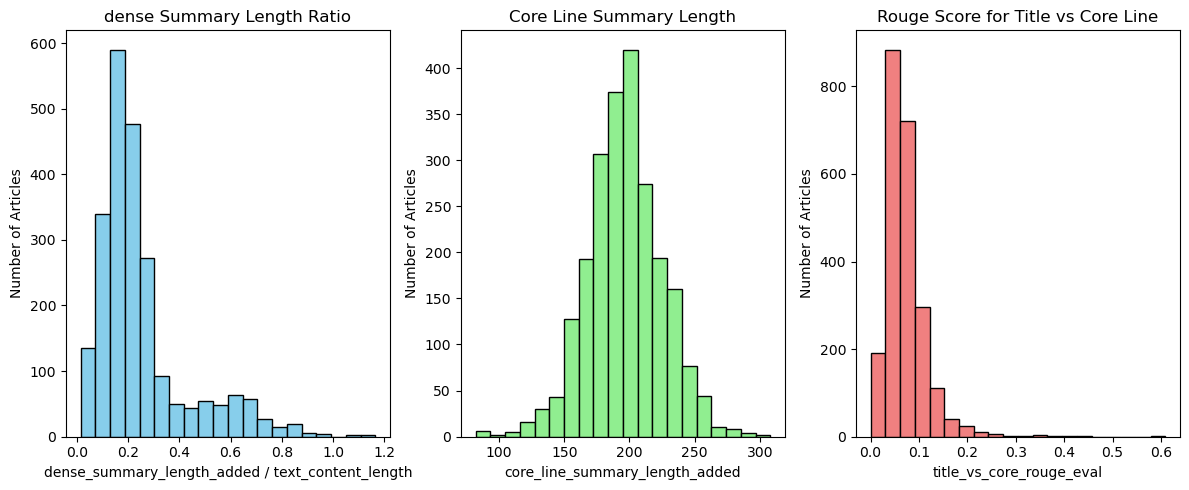

In [17]:
from ttd.flows.analysis import plot_summary_distributions
fig =plot_summary_distributions(articles)

In [18]:
from ttd.flows.analysis import get_rouge_top_bottom
bottom5, top5 = get_rouge_top_bottom(articles)
print("🔻 Bottom 5 ROUGE Scores")
bottom5

🔻 Bottom 5 ROUGE Scores


,title,core_line_summary_added,title_vs_core_rouge_eval
477,Simplifying AI Development at Scale: Google Cloud Integrates Anyscale's RayTurbo with GKE,"A client-side application error occurred, requiring debugging via the browser console to identify and resolve the issue.",0.0
2948,Bypassing MTE with CVE-2025-0072,"The GitHub Secure Code Game trains developers in AI security, addressing vulnerabilities like DNS rebinding and SAML implementation flaws to improve real-world system trust.",0.0
2537,Code. Create. Commit. Welcome to dev/core,"GitHub Copilot enhances workflow automation with task assignment and background processing, while GitHub's availability report and top AI projects showcase platform developments.",0.0
2510,Vibe Coding Survival Guide,"AI can accelerate data engineering with tools like Dagster, but requires careful oversight and testing to ensure code quality and prevent errors in complex workflows.",0.0
2094,"Shipping code faster with o3, o4-mini, and GPT-4.1","A client-side error, logged in the browser console, requires investigation to ensure proper application functionality.",0.0


In [19]:
print("🔺 Top 5 ROUGE Scores")
top5

🔺 Top 5 ROUGE Scores


,title,core_line_summary_added,title_vs_core_rouge_eval
3534,Elon Musk’s AI Startup Set to Get Debt Backing From TPG,"Elon Musk's AI startup is poised to receive debt financing from TPG, signaling investor confidence in the venture.",0.407407
1926,RLHF 101: A Technical Tutorial on Reinforcement Learning from Human Feedback,Reinforcement Learning from Human Feedback (RLHF) is a machine learning technique.,0.454545
3221,RLHF 101: A Technical Tutorial on Reinforcement Learning from Human Feedback,Reinforcement Learning from Human Feedback (RLHF) is a machine learning technique.,0.454545
2115,Brookfield to Invest $10 Billion Building AI Hub in Sweden,Brookfield's $10 billion investment in a Swedish AI hub signifies a major expansion of AI infrastructure in Europe.,0.608696
3410,Brookfield to Invest $10 Billion Building AI Hub in Sweden,Brookfield's $10 billion investment in a Swedish AI hub signifies a major expansion of AI infrastructure in Europe.,0.608696


### 🏷️ Tags / Clusters Summary

In [20]:
from ttd.flows.analysis import generate_tag_cluster_summary_markdown
md, summary = generate_tag_cluster_summary_markdown(articles)
print(md)


**Total Tags (across all articles)**: 12731  
**Total Clusters (distinct)**: 1816  
**Avg Tags per Article**: 5.54  
**Avg Clusters per Article**: 3.80



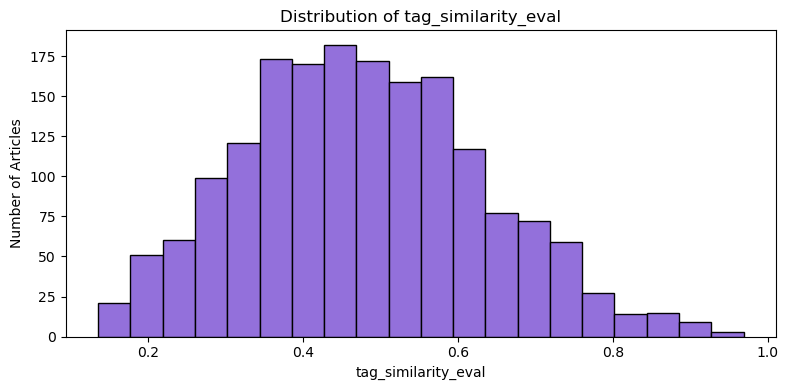

In [21]:
from ttd.flows.analysis import plot_tag_similarity_distribution
fig, top_5, bottom_5 = plot_tag_similarity_distribution(articles)

In [22]:
print("🔻 Bottom 5 Articles by Tag Similarity")
bottom_5

🔻 Bottom 5 Articles by Tag Similarity


,Title,Tags,Predicted Tags,Similarity
0,"Distinguishing between edible and poisonous fungi is difficult, mushroom expert tells Erin Patterson trial","Victoria, Australia news","Homicide, Mushroom poisoning, Death cap mushroom, Forensic science, Toxicology",0.135
1,Brookfield to Invest $10 Billion Building AI Hub in Sweden,TOR:BAM,"Artificial intelligence, Investment, Sweden",0.142
2,Brookfield to Invest $10 Billion Building AI Hub in Sweden,TOR:BAM,"Artificial intelligence, Investment, Sweden",0.142
3,"The Download: the next anti-drone weapon, and powering AI’s growth",The Download,"Artificial intelligence, United States, China, national security, disinformation",0.150
4,"The Download: the next anti-drone weapon, and powering AI’s growth",The Download,"Artificial intelligence, United States, China, national security, disinformation",0.150


In [23]:
print("🔺 Top 5 Articles by Tag Similarity")
top_5

🔺 Top 5 Articles by Tag Similarity


,Title,Tags,Predicted Tags,Similarity
0,Smaller AI models redefine what’s possible with Kubernetes,"AI, Cube Event Coverage, NEWS, #KubeConEU, #theCube, AI in cloud native, artificial intelligence, Blockchain, CLOUD, cloud-native, CloudNativeConEU, containers, cybersecurity, data platform, devops, distributed systems, eBPF, edge deployment, energy efficiency, enterprise AI, enterprise computing, GitOps, Holly Cummins, hybrid cloud, KubeCon + CloudNativeCon Europe 2025, KubeConCloudNativeCon25eventpage, Kubernetes, Kubernetes cost optimization, Linux, Linux Foundation, linux kernel, multicloud, Open Source, OpenTelemetry, operator pattern and automation, orchestration, platform as a product, platform engineering, PyTorch, Red Hat, resilience, Rust, Service Mesh, software engineering, standardization, stateless vs stateful, Sustainability, system administration, Vincent Caldeira","Kubernetes, artificial intelligence, cloud native, edge computing, energy efficiency",0.901
1,Where containers meet AI: Google’s evolving Kubernetes ecosystem,"Cube Event Coverage, Infra, NEWS, #GoogleCloud, #theCube, AI infrastructure, Bobby Allen, Brandon Royal, cloud-native infrastructure, container orchestration, containers, Docker, dynamic resource allocation, enterprise AI, Gari Singh, GKE Autopilot, google cloud, Google Cloud Run, Google Cloud: Passport to Containers 2025, Google Kubernetes Engine, Google LLC, GooglePassportToContainers25eventpage, graphics processing units, Jago Macleod, John Belamaric, Kubernetes, L'Oreal, machine learning, machine learning deployment, model inference, model training, open-source software, Red Hat, Savannah Peterson, serverless computing, Shopify, Spencer Bischof, Steren Giannini, Tensor Processing Units, Yunong Xiao","Kubernetes, Google Kubernetes Engine, cloud-native computing, artificial intelligence, machine learning, Google Cloud Run",0.918
2,Luca Guadagnino set to direct fact-based drama about OpenAI,"Luca Guadagnino, OpenAI, Sam Altman, US news, Andrew Garfield, Film, Culture, Technology, Artificial intelligence (AI)","film, OpenAI, Sam Altman, artificial intelligence, Luca Guadagnino",0.932
3,Luca Guadagnino set to direct fact-based drama about OpenAI,"Luca Guadagnino, OpenAI, Sam Altman, US news, Andrew Garfield, Film, Culture, Technology, Artificial intelligence (AI)","film, OpenAI, Sam Altman, artificial intelligence, Luca Guadagnino",0.932
4,Platform engineering maturity brings new challenges and deeper collaboration,"AI, Cube Event Coverage, NEWS, #KubeConEU, #theCube, AI in cloud native, AI-enabled apps, artificial intelligence, Blockchain, CLOUD, cloud-native, CloudNativeConEU, community collaboration, compliance, confidential computing, containers, cybersecurity, data platform, data sovereignty, devops, DevSecOps, eBPF, enterprise computing, Gen AI, GitOps, Harriet Lawrence, hybrid cloud, Kirsten Newcomer, KubeCon + CloudNativeCon Europe 2025, KubeConCloudNativeCon25eventpage, Kubernetes, Kubernetes cost optimization, Linux, Linux Foundation, linux kernel, multicloud, Open Source, OpenShift, OpenShift lightspeed, OpenTelemetry, operator pattern and automation, platform as a product, platform engineering, PyTorch, Red Hat, Rust, scalability, Service Mesh, software engineering, system administration","Platform engineering, DevSecOps, cloud-native applications, artificial intelligence, GitOps, confidential computing",0.969


🧩 Top 50 Clusters Histogram


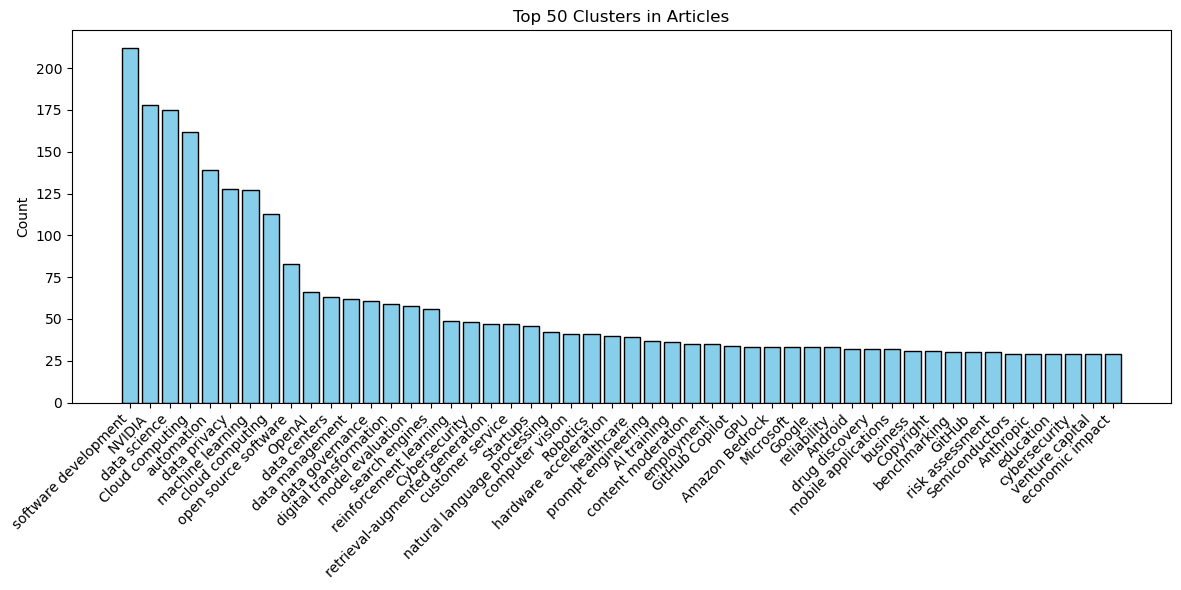

In [24]:
from ttd.flows.analysis import plot_top_clusters_histogram

print("🧩 Top 50 Clusters Histogram")
fig = plot_top_clusters_histogram(articles, top_n=50)

## Inspect result

In [25]:
from ttd.storage.ttd_storage import TTDStorage

storage = TTDStorage(flow.config.get("db_path"))
storage.get_all('tagged_articles')

[{'original_table_name': 'replicated_articles',
  'original_doc_id': '93',
  'table_name': 'tagged_articles',
  'created_at': '2025-06-05T16:18:27.286961',
  'doc_id': '1'}]

In [26]:
from ttd.models.loader import load_model_spec

model_spec_name = "tag_embedding_spec"
tag_embedding_spec = load_model_spec(model_spec_name)

In [27]:
safe_pretty_print(tag_embedding_spec)

ModelSpec(
    name='tag_embedding_spec',
    version='v1',
    description='Calculates an embedding for a tag.',
    input_schema=None,
    output_schema=None,
    model_id=None,
    provider='openai_embedding',
    config=OpenAIEmbeddingConfig(
        model_name='text-embedding-3-large',
        matrix_cache_dir='/Users/mathieucrilout/Repos/train_tune_deploy/data/models/text-e
mbedding-3-large',
        api_key_env_var='OPENAI_API_KEY',
        api_key='sk-proj-0ULuCJJ_k36Y0hCT7lr3jTalM1bvhWftSq16MdStd5P8Z1s2a2FIec1f4gRXDDBn2
_9W5EYheyT3BlbkFJWiegx46oYp6F1xpQUiUO-uHiN5iqmeASJsDOERiLnIHWXx2iR4g02qPEy-kLWLckQVS-WuT7s
A',
        dimensions=None
    )
)